In [35]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate realistic data
names = [f"Friend_{i}" for i in range(100)]
posts_frequently = np.random.randint(0, 11, size=100)         # Scale: 0–10
active = np.random.randint(0, 11, size=100)                    # Scale: 0–10
replies = np.random.randint(50, 101, size=100)                 # % responsiveness
followers = np.random.randint(100, 10000, size=100)            # Number of followers

# Simulate personality: extroverts tend to be more active and responsive
personality = [
    1 if (p + a + r/10 + f/1000) > 20 else 0
    for p, a, r, f in zip(posts_frequently, active, replies, followers)
]

# Create DataFrame
df = pd.DataFrame({
    "Name": names,
    "Post/Shares Frequently": posts_frequently,
    "Active": active,
    "Replies to comments": replies,
    "# of friends/followers": followers,
    "Personality": personality
})

# Save to CSV
df.to_csv("personality_data.csv", index=False)

       Name  Post/Shares Frequently  Active  Replies to comments  \
0  Friend_0                       6       9                   68   
1  Friend_1                       3       6                   51   
2  Friend_2                      10       9                   93   
3  Friend_3                       7       8                   75   
4  Friend_4                       4       6                   81   

   # of friends/followers  Personality  
0                    4087            1  
1                    9819            1  
2                    6115            1  
3                    1318            1  
4                    4596            1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    100 non-null    object
 1   Post/Shares Frequently  100 non-null    int64 
 2   Active                  100 n

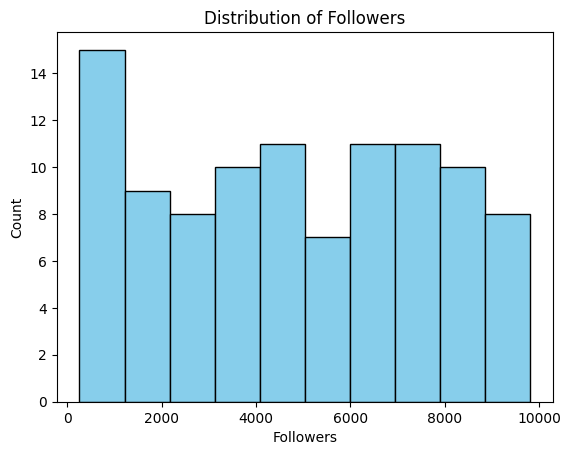

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv("personality_data.csv")

# Display first 5 rows
print(df.head())

# Display summary
print(df.info())

# Count of each personality type
print(df["Personality"].value_counts())

# Histogram of followers
plt.hist(df["# of friends/followers"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Followers")
plt.ylabel("Count")
plt.title("Distribution of Followers")
plt.show()

# Drop the Name column
df = df.drop(columns=["Name"])

In [37]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop(columns=["Personality"])
y = df["Personality"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 4)
y_train shape: (80,)
X_test shape: (20, 4)
y_test shape: (20,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

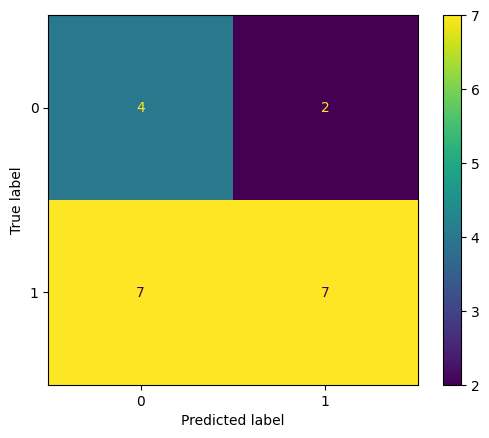

Accuracy: 0.55
Precision: [0.36363636 0.77777778]
Recall: [0.66666667 0.5       ]
F1 Score: [0.47058824 0.60869565]


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average=None))
print("Recall:", recall_score(y_test, y_pred, average=None))
print("F1 Score:", f1_score(y_test, y_pred, average=None))

In [41]:
# Example input: [Posts Frequently, Active, Replies %, Followers]
new_data = pd.DataFrame([[7, 8, 90, 3000]], columns=X.columns)
prediction = knn.predict(new_data)
print("Predicted Personality:", "Extrovert" if prediction[0] == 1 else "Introvert")

Predicted Personality: Introvert
